In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
from pandas_profiling import ProfileReport

import matplotlib 
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier,ExtraTreesClassifier


In [42]:
url="https://raw.githubusercontent.com/dsrscientist/dataset1/master/heartdisease_data.csv"
df=pd.read_csv(url,sep=",",names= ["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","num"])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,4,140,260,0,1,112,1,3,2,?,?,2
1,44,1,4,130,209,0,1,127,0,0,?,?,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
3,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
4,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0


#age - age in years
#sex - (1 = male; 0 = female)
#cp - chest pain type
0: Typical angina: chest pain related decrease blood supply to the heart
1: Atypical angina: chest pain not related to heart
2: Non-anginal pain: typically esophageal spasms (non heart related)
3: Asymptomatic: chest pain not showing signs of disease
#trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
#chol - serum cholestoral in mg/dl
serum = LDL + HDL + .2 * triglycerides
above 200 is cause for concern
#fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
'>126' mg/dL signals diabetes
#restecg - resting electrocardiographic results
0: Nothing to note
1: ST-T Wave abnormality
can range from mild symptoms to severe problems
signals non-normal heart beat
2: Possible or definite left ventricular hypertrophy
Enlarged heart's main pumping chamber
#thalach - maximum heart rate achieved
#exang - exercise induced angina (1 = yes; 0 = no)
#oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
#slope - the slope of the peak exercise ST segment
0: Upsloping: better heart rate with excercise (uncommon)
1: Flatsloping: minimal change (typical healthy heart)
2: Downslopins: signs of unhealthy heart
#ca - number of major vessels (0-3) colored by flourosopy
colored vessel means the doctor can see the blood passing through
the more blood movement the better (no clots)
#thal - thalium stress result
1,3: normal
6: fixed defect: used to be defect but ok now
7: reversable defect: no proper blood movement when excercising
#target - have disease or not (1=yes, 0=no) (= the predicted attribute)


In [43]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,4,140,260,0,1,112,1,3,2,?,?,2
1,44,1,4,130,209,0,1,127,0,0,?,?,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
3,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
4,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0


In [44]:
df=df.replace(to_replace="?",value=np.nan)

In [45]:
df.info()
#We can observe few Nan values and object typr data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       200 non-null    int64 
 1   sex       200 non-null    int64 
 2   cp        200 non-null    int64 
 3   trestbps  144 non-null    object
 4   chol      193 non-null    object
 5   fbs       193 non-null    object
 6   restecg   200 non-null    int64 
 7   thalach   147 non-null    object
 8   exang     147 non-null    object
 9   oldpeak   144 non-null    object
 10  slope     98 non-null     object
 11  ca        2 non-null      object
 12  thal      34 non-null     object
 13  num       200 non-null    int64 
dtypes: int64(5), object(9)
memory usage: 22.0+ KB


In [46]:
for col in df:
    print("Coulmun Name "+col,df[col].unique())

Coulmun Name age [63 44 60 55 66 65 56 59 62 57 46 58 64 74 52 69 51 54 77 61 40 41 42 53
 68 67 72 75 49 35 43 48 50 45 76 70 71 38 37]
Coulmun Name sex [1 0]
Coulmun Name cp [4 3 2 1]
Coulmun Name trestbps ['140' '130' '132' '142' '110' '120' '150' '180' '160' '126' nan '128'
 '170' '152' '116' '124' '0' '122' '144' '154' '125' '104' '136' '134'
 '138' '178' '146' '135' '158' '106' '112' '102' '96' '172' '155' '156'
 '118' '100' '190' '114' '127']
Coulmun Name chol ['260' '209' '218' '228' '213' '0' '236' '267' '166' '220' '177' '186'
 '100' '171' '230' '281' '203' '277' '233' '240' '153' '224' '316' '311'
 '270' '217' '214' '252' '339' '216' '276' '458' '241' '384' '297' '248'
 '308' '208' '227' '210' '245' '225' '198' '195' '161' '258' '235' '305'
 '223' '282' '349' nan '160' '312' '283' '142' '211' '306' '222' '202'
 '197' '204' '274' '192' '298' '272' '200' '261' '181' '221' '175' '219'
 '310' '232' '273' '182' '292' '289' '193' '170' '369' '173' '271' '244'
 '285' '243' '237' '1

In [47]:
for column in ['thalach','chol','trestbps','oldpeak','exang','fbs']:
    df[column]=(df[column]).astype(str).astype(float)
    print(df[column].dtype)

float64
float64
float64
float64
float64
float64


In [53]:
df['num'] = np.where(df['num'] >=1, 1, df['num'])
#we have replaced the values (1,2,3,4) with 1 as the presence of the heart diseas 
#Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       200 non-null    int64  
 1   sex       200 non-null    int64  
 2   cp        200 non-null    int64  
 3   trestbps  144 non-null    float64
 4   chol      193 non-null    float64
 5   fbs       193 non-null    float64
 6   restecg   200 non-null    int64  
 7   thalach   147 non-null    float64
 8   exang     147 non-null    float64
 9   oldpeak   144 non-null    float64
 10  slope     98 non-null     object 
 11  ca        2 non-null      object 
 12  thal      34 non-null     object 
 13  num       200 non-null    int64  
dtypes: float64(6), int64(5), object(3)
memory usage: 22.0+ KB


#  Handling missing values 

Column "Ca" has only one attribute and null values so it can be dropped 
#Missing values in "thalach" can be replaced by Mean of the column

Replacing the values with following
#trestbps 144 non-null - Mean
#chol 193 non-null - Mean
#fbs 193 non-null - Mode
#thalach 147 non-null - Mean
#exang 147 non-null - Mode
#oldpeak 144 non-null - Mean 



####Droping the following Columns####

#slope 98 non-null - Drop as half of the values are missing
#ca 2 non-null - Drop
#thal 34 non-null - Drop as 80% of the values are missing

In [50]:
df.drop(["thal","ca","slope"],axis=1,inplace=True)

In [51]:
#Replacing Nan Values with Mode
for column in ['exang','fbs']:
    df[column].fillna(df[column].mode()[0], inplace=True)

#Replacing Nan Values with Mean
for column in ['thalach','chol','trestbps','oldpeak']:
    df[column].fillna(df[column].mean(), inplace=True)


In [54]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
0,63,1,4,140.0,260.0,0.0,1,112.0,1.0,3.0,1
1,44,1,4,130.0,209.0,0.0,1,127.0,0.0,0.0,0
2,60,1,4,132.0,218.0,0.0,1,140.0,1.0,1.5,1
3,55,1,4,142.0,228.0,0.0,1,149.0,1.0,2.5,1
4,66,1,3,110.0,213.0,1.0,2,99.0,1.0,1.3,0


In [55]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,59.350000,0.970000,3.505000,133.763889,178.746114,0.340000,0.735000,122.795918,0.740000,1.320833,0.745000
std,7.811697,0.171015,0.795701,18.257507,112.011633,0.474898,0.683455,18.835692,0.439735,0.937755,0.436955
min,35.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,0.000000,-0.500000,0.000000
25%,55.000000,1.000000,3.000000,125.750000,129.250000,0.000000,0.000000,112.000000,0.000000,1.000000,0.000000
50%,60.000000,1.000000,4.000000,133.763889,214.000000,0.000000,1.000000,122.795918,1.000000,1.320833,1.000000
75%,64.000000,1.000000,4.000000,140.000000,254.500000,1.000000,1.000000,130.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,4.000000,190.000000,458.000000,1.000000,2.000000,180.000000,1.000000,4.000000,1.000000


#Minimum age is 35 and maximum is 77 
#97%of the data is of Male sex
#Minimum trestbps is 0 and maximum is 190


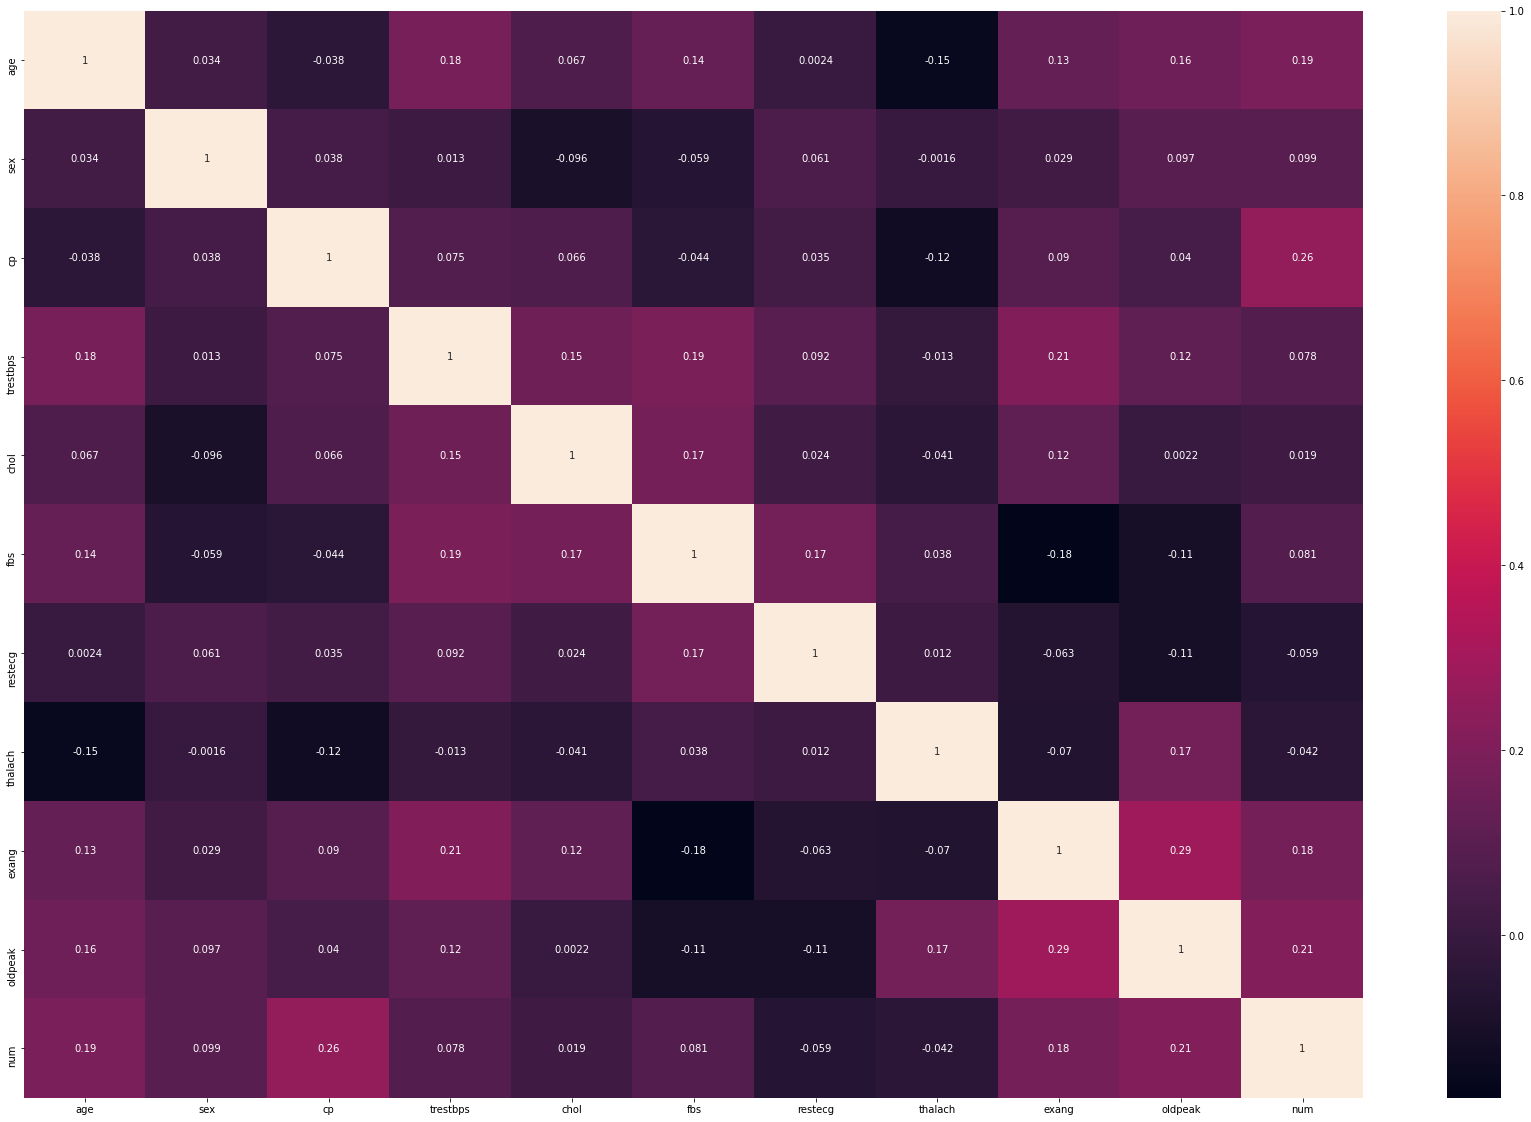

In [56]:
corr_hmap= df.corr()
plt.figure(figsize=(30,20))
sns.heatmap(corr_hmap,annot=True)
plt.show()

age            AxesSubplot(0.125,0.536818;0.110714x0.343182)
sex         AxesSubplot(0.257857,0.536818;0.110714x0.343182)
cp          AxesSubplot(0.390714,0.536818;0.110714x0.343182)
trestbps    AxesSubplot(0.523571,0.536818;0.110714x0.343182)
chol        AxesSubplot(0.656429,0.536818;0.110714x0.343182)
fbs         AxesSubplot(0.789286,0.536818;0.110714x0.343182)
restecg           AxesSubplot(0.125,0.125;0.110714x0.343182)
thalach        AxesSubplot(0.257857,0.125;0.110714x0.343182)
exang          AxesSubplot(0.390714,0.125;0.110714x0.343182)
oldpeak        AxesSubplot(0.523571,0.125;0.110714x0.343182)
num            AxesSubplot(0.656429,0.125;0.110714x0.343182)
dtype: object

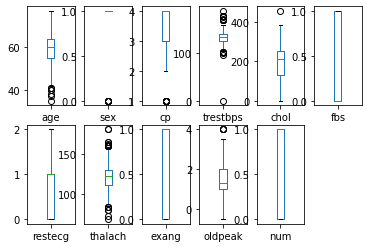

In [57]:
df.plot(kind="box",subplots=True,layout=(2,6))
#As we observe there are few outliers in the data 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000293AFA4FB50>,
      dtype=object)

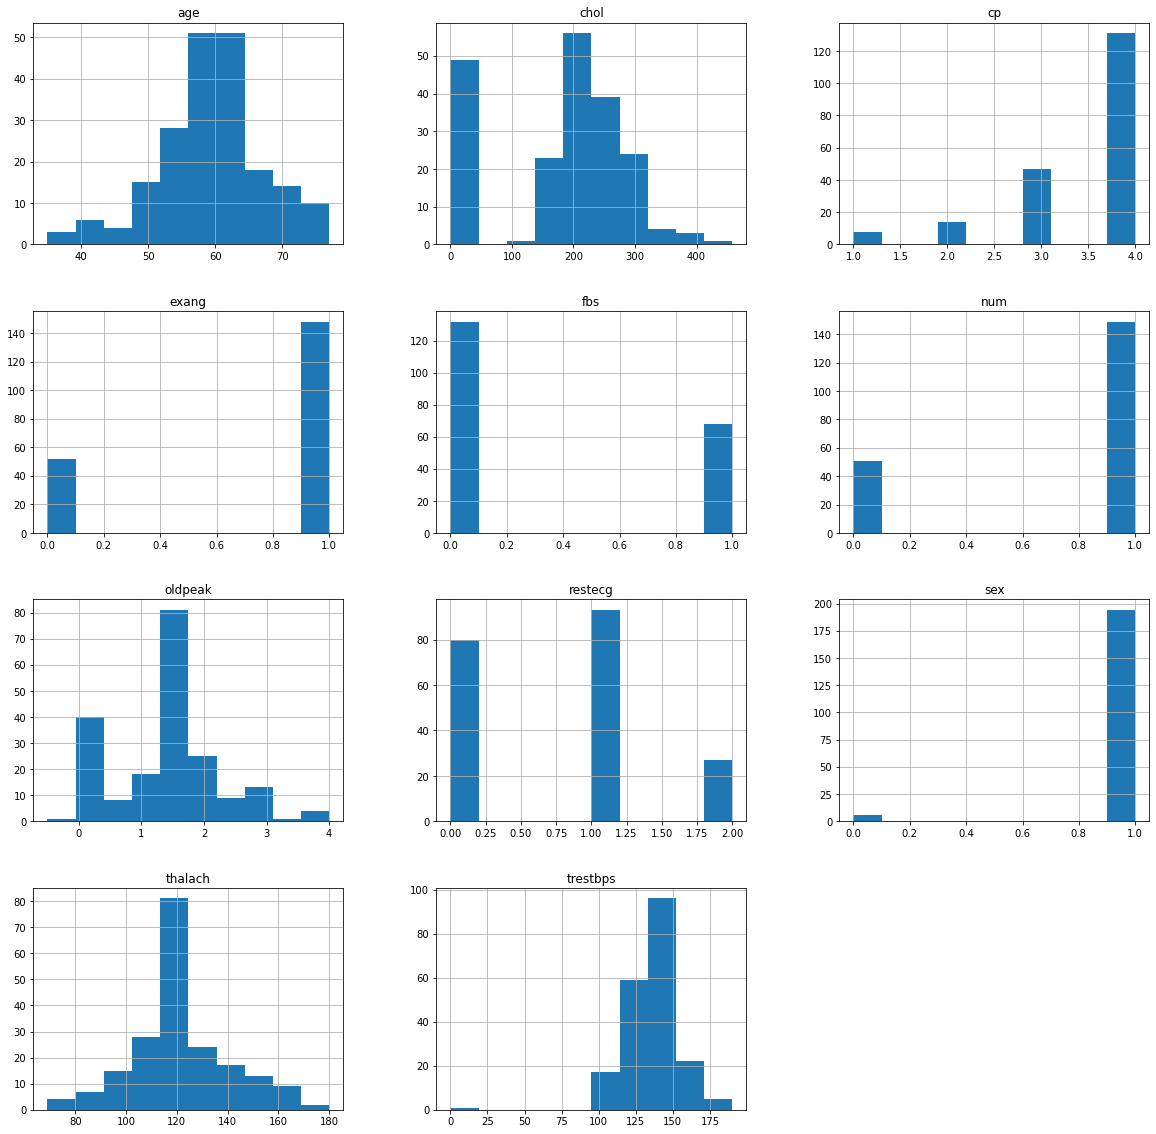

In [58]:
df.hist(figsize=(20,20))

In [16]:
df["sex"].value_counts()
#there is very less divertion in sex data so it can be dropped 

1    197
0      3
Name: sex, dtype: int64

In [114]:
#df.drop(["sex"],axis=1,inplace=True)

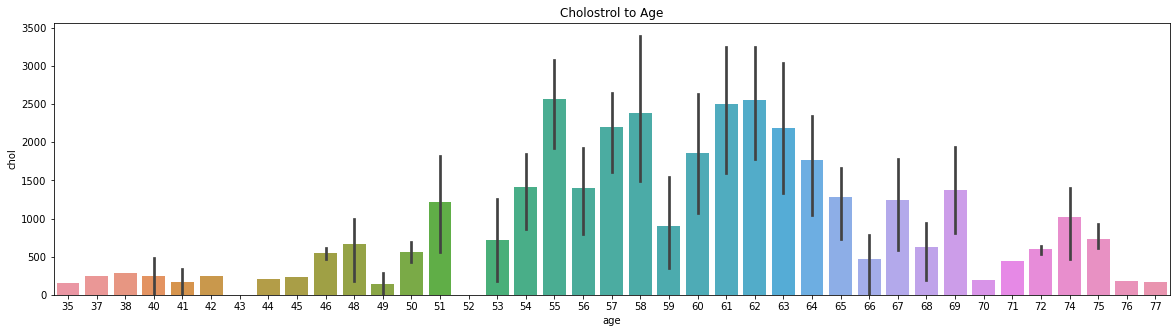

In [59]:
plt.figure(figsize=(20, 5))
ax = sns.barplot(x = df.age, y = df.chol, estimator = np.sum)
plt.title('Cholostrol to Age')
plt.show()

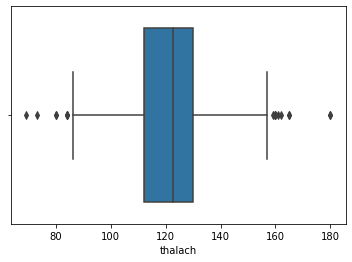

In [60]:
sns.boxplot(x=df.thalach)

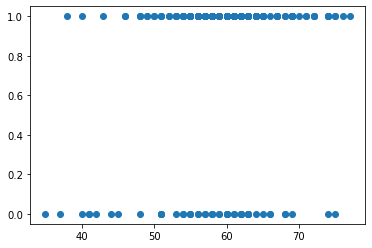

In [61]:
plt.scatter(df.age,df.num)

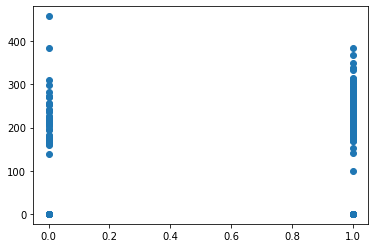

In [62]:
plt.scatter(df.num,df.chol)

In [63]:
df.skew()

age        -0.404091
sex        -5.552105
cp         -1.648734
trestbps   -1.511363
chol       -0.571879
fbs         0.680636
restecg     0.391463
thalach     0.148515
exang      -1.102593
oldpeak     0.423414
num        -1.132724
dtype: float64

In [64]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z
threshold=3
print(np.where(z>3))
df_new=df[(z<3).all(axis=1)]
print("\n Original Shape", df.shape, "New Shape",df_new.shape)

(array([ 24,  33,  51,  66,  70,  72,  76,  79,  96,  97, 126, 128, 131,
       133, 137, 176, 190, 195, 196], dtype=int64), array([7, 3, 1, 2, 7, 2, 2, 1, 0, 2, 1, 1, 2, 2, 2, 3, 1, 1, 2],
      dtype=int64))

 Original Shape (200, 11) New Shape (181, 11)


In [65]:
Percntage_loss=((200-181)/200)*100
print("\nPercentage loss:",Percntage_loss)


Percentage loss: 9.5


In [66]:
df_new.skew()

age        -0.341400
sex         0.000000
cp         -1.414098
trestbps    0.516323
chol       -0.546859
fbs         0.748785
restecg     0.386145
thalach    -0.064362
exang      -1.207866
oldpeak     0.445245
num        -1.243576
dtype: float64

Loss of 9.5% data for a small dataset is not ideal so we are going ahead with model building with existing dataset only 

In [67]:
y=df["num"]
x=df.drop("num", axis=1)

In [68]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_t=sc.fit_transform(x)
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
lr=LogisticRegression()
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings("ignore")

In [69]:
max_scr=0
for i in range(30,100):
    x_train,x_test,y_train,y_test=train_test_split(x_t,y,test_size=.20,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,2)==round(accuracy_score(y_test,pred_test)*100,2):
    #if accuracy_score(y_train,pred_train)*100>max_scr:  
        max_scr=accuracy_score(y_train,pred_train)*100
        print("At random state",i,"The model Perfomes very well")
        print("Training accuracy_score is:",accuracy_score(y_train,pred_train)*100)
        print("Testing accuracy_score is:",accuracy_score(y_test,pred_test), end = "\n\n\n")

At random state 42 The model Perfomes very well
Training accuracy_score is: 80.0
Testing accuracy_score is: 0.8


At random state 67 The model Perfomes very well
Training accuracy_score is: 77.5
Testing accuracy_score is: 0.775




#Model has perfomed best at 42 random state
At random state 42 The model Perfomes very well
Training accuracy_score is: 80.0
Testing accuracy_score is: 0.8

In [70]:
x_train,x_test,y_train,y_test=train_test_split(x_t,y,test_size=.20,random_state=42)
num_folds = 10
seed = 42
scoring = 'accuracy'

In [71]:
models= [
    ("SVC",SVC()),
    ("Logistic Regression",LogisticRegression()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Naive Bayes",GaussianNB()),
    ("KNearest Neighbors",KNeighborsClassifier(3)),
    ("RandomForestClassifier",RandomForestClassifier())
    ]

In [72]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


SVC: 0.725000 (0.134629)
Logistic Regression: 0.706250 (0.097026)
Decision Tree: 0.637500 (0.096014)
Naive Bayes: 0.750000 (0.100778)
KNearest Neighbors: 0.687500 (0.104583)
RandomForestClassifier: 0.731250 (0.088609)


#over all the perfomance of Naive Bayes and RandomForestClassifie has be well

# HyperParameter Tyning

In [73]:
#RandomForest Hyper Parameter Tuning

n_estimators = [10, 100]
max_features = ['sqrt', 'log2']
param_grid = dict(n_estimators=n_estimators,max_features=max_features)
model = RandomForestClassifier()
kfold = KFold(n_splits=num_folds, random_state=7)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(x_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
ranks = grid_result.cv_results_['rank_test_score']
for mean, stdev, param, rank in zip(means, stds, params, ranks):
    print("#%d %f (%f) with: %r" % (rank, mean, stdev, param))

Best: 0.750000 using {'max_features': 'sqrt', 'n_estimators': 100}
#2 0.737500 (0.072887) with: {'max_features': 'sqrt', 'n_estimators': 10}
#1 0.750000 (0.096825) with: {'max_features': 'sqrt', 'n_estimators': 100}
#4 0.700000 (0.082916) with: {'max_features': 'log2', 'n_estimators': 10}
#3 0.731250 (0.100972) with: {'max_features': 'log2', 'n_estimators': 100}


In [74]:
#Parameter scaling GaussianNB

param_grid = {'var_smoothing': np.logspace(0,-9, num=100)}
model = GaussianNB()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(x_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
ranks = grid_result.cv_results_['rank_test_score']
for mean, stdev, param, rank in zip(means, stds, params, ranks):
    print("#%d %f (%f) with: %r" % (rank, mean, stdev, param))

Best: 0.750000 using {'var_smoothing': 0.01}
#97 0.725000 (0.115920) with: {'var_smoothing': 1.0}
#97 0.725000 (0.112500) with: {'var_smoothing': 0.8111308307896871}
#97 0.725000 (0.101550) with: {'var_smoothing': 0.657933224657568}
#100 0.718750 (0.105512) with: {'var_smoothing': 0.533669923120631}
#91 0.731250 (0.104769) with: {'var_smoothing': 0.43287612810830584}
#91 0.731250 (0.104769) with: {'var_smoothing': 0.3511191734215131}
#91 0.731250 (0.104769) with: {'var_smoothing': 0.2848035868435802}
#91 0.731250 (0.104769) with: {'var_smoothing': 0.23101297000831597}
#79 0.743750 (0.116760) with: {'var_smoothing': 0.1873817422860384}
#91 0.731250 (0.118750) with: {'var_smoothing': 0.15199110829529336}
#91 0.731250 (0.118750) with: {'var_smoothing': 0.12328467394420659}
#84 0.737500 (0.107529) with: {'var_smoothing': 0.1}
#84 0.737500 (0.107529) with: {'var_smoothing': 0.08111308307896872}
#84 0.737500 (0.107529) with: {'var_smoothing': 0.0657933224657568}
#84 0.737500 (0.107529) with:

In [77]:
# we where not able to imporve the score by parameter tuning 
#Lets try boosing techniques

In [85]:
GNB= GaussianNB(var_smoothing= 0.01)
model= RandomForestClassifier(n_estimators=100,max_features= 'sqrt')
model.fit(x_train, y_train)


RandomForestClassifier(max_features='sqrt')

In [86]:
model.fit(x_train, y_train)
predictions = model.predict(x_test)
print(accuracy_score(y_test, predictions)) 
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.675
[[ 3  5]
 [ 8 24]]
              precision    recall  f1-score   support

           0       0.27      0.38      0.32         8
           1       0.83      0.75      0.79        32

    accuracy                           0.68        40
   macro avg       0.55      0.56      0.55        40
weighted avg       0.72      0.68      0.69        40



In [77]:
models= [AdaBoostClassifier(),GradientBoostingClassifier(),BaggingClassifier(),ExtraTreesClassifier()]
names = []

for m in models:
    m.fit(x_train, y_train)
    m.score(x_train, y_train)
    predm = m.predict(x_test)
    names.append(m)
    msg = "%s:" % (names)
    print(msg)
    print(accuracy_score(y_test, predm)) 
    print(confusion_matrix(y_test, predm))
    print(classification_report(y_test, predm))
    print("****************************************************************")
    print("\n")

[AdaBoostClassifier()]:
0.625
[[ 1  7]
 [ 8 24]]
              precision    recall  f1-score   support

           0       0.11      0.12      0.12         8
           1       0.77      0.75      0.76        32

    accuracy                           0.62        40
   macro avg       0.44      0.44      0.44        40
weighted avg       0.64      0.62      0.63        40

****************************************************************


[AdaBoostClassifier(), GradientBoostingClassifier()]:
0.575
[[ 2  6]
 [11 21]]
              precision    recall  f1-score   support

           0       0.15      0.25      0.19         8
           1       0.78      0.66      0.71        32

    accuracy                           0.57        40
   macro avg       0.47      0.45      0.45        40
weighted avg       0.65      0.57      0.61        40

****************************************************************


[AdaBoostClassifier(), GradientBoostingClassifier(), BaggingClassifier()]:
0.65
[[ 4

0.825
[[ 5  3]
 [ 4 28]]
              precision    recall  f1-score   support

           0       0.56      0.62      0.59         8
           1       0.90      0.88      0.89        32

    accuracy                           0.82        40
   macro avg       0.73      0.75      0.74        40
weighted avg       0.83      0.82      0.83        40



0.75

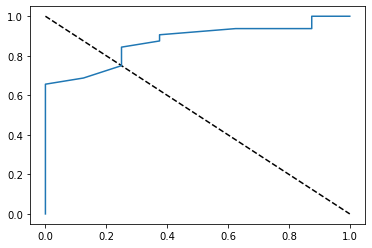

In [92]:
ET= ExtraTreesClassifier(n_estimators=100)
ET.fit(x_train, y_train)

predictions = ET.predict(x_test)
print(accuracy_score(y_test, predictions)) 
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

y_pred_rc=ET.predict_proba(x_test)[:,1]
tpr,fpr,thresholds=roc_curve(y_test,y_pred_rc)
plt.plot([0,1],[1,0],"k--")
plt.plot(tpr,fpr,label="ExtraTree Classifier")
auc_score = roc_auc_score(y_test,ET.predict(x_test))
auc_score

0.725
[[ 3  5]
 [ 6 26]]
              precision    recall  f1-score   support

           0       0.33      0.38      0.35         8
           1       0.84      0.81      0.83        32

    accuracy                           0.73        40
   macro avg       0.59      0.59      0.59        40
weighted avg       0.74      0.72      0.73        40



0.59375

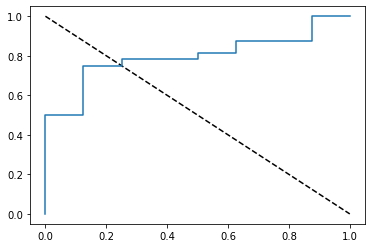

In [91]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

GNB.fit(x_train, y_train)
GNB.score(x_train, y_train)
predm = GNB.predict(x_test)
print(accuracy_score(y_test, predm)) 
print(confusion_matrix(y_test, predm))
print(classification_report(y_test, predm))
#AucRoc
y_pred_rc=GNB.predict_proba(x_test)[:,1]
tpr,fpr,thresholds=roc_curve(y_test,y_pred_rc)
plt.plot([0,1],[1,0],"k--")
plt.plot(tpr,fpr,label="LogisticRegressor")
auc_score = roc_auc_score(y_test,GNB.predict(x_test))
auc_score

In [ ]:
Model Has Perfomed well with Extra Tree Classsifier 

In [93]:
import joblib
joblib.dump(ET,"Attrition.pkl")

['Attrition.pkl']